# 目录
+ 决策树
+ 决策树调参
+ 随机森林
+ 随机森林调参
+ 支持向量机
+ 多类别分类问题
+ Linear Discriminant Analysis (LDA)
+ Quadratic Discernment Analysis (QDA)
+ 分类问题中的随机梯度下降
+ 朴素贝叶斯
+ 半监督学习

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

# 决策树
DecisionTreeClassifier类

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 创建分类数据集
from sklearn import datasets
X, y = datasets.make_classification(n_samples=1000, n_features=3, n_redundant=0)

In [5]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
preds = dt.predict(X)

In [7]:
(y == preds).mean() # 正确率为100%

1.0

## 参数
max_depth

In [8]:
n_features=200
X, y = datasets.make_classification(750, n_features, n_informative=5) # 创建一个更为复杂（特征更多）的分类数据集

In [9]:
import numpy as np
training = np.random.choice([True, False], p=[.75, .25], size=len(y)) # 75%训练集，25%测试集

In [10]:
# 选择不同的max_depth参数（1~200）进行建模
accuracies = []

for x in np.arange(1, n_features+1):
    dt = DecisionTreeClassifier(max_depth=x)
    
    dt.fit(X[training], y[training])
    
    preds = dt.predict(X[~training])
    
    accuracies.append((preds == y[~training]).mean())

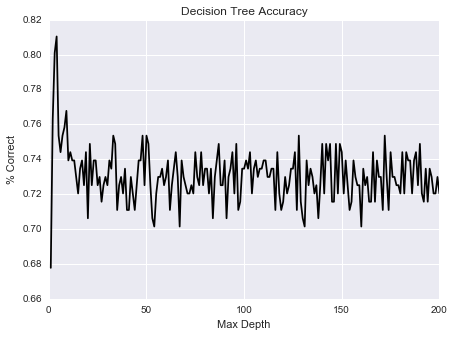

In [11]:
# 绘制不同max_depth参数下的正确率
f, ax = plt.subplots(figsize=(7, 5))

ax.plot(range(1, n_features+1), accuracies, color='k')

ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Correct")
ax.set_xlabel("Max Depth");

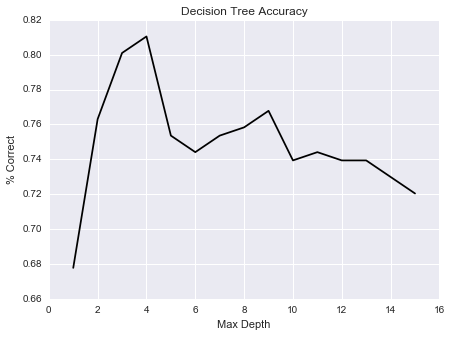

In [12]:
# 由上图可以看出，max_depth参数值较低时，分类正确率较高。因此，绘制max_depth参数在1~15时的分类正确率
N = 15

f, ax = plt.subplots(figsize=(7, 5))

ax.plot(range(1, n_features+1)[:N], accuracies[:N], color='k')

ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Correct")
ax.set_xlabel("Max Depth");

## 特征重要性评分
feature\_importances_属性

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

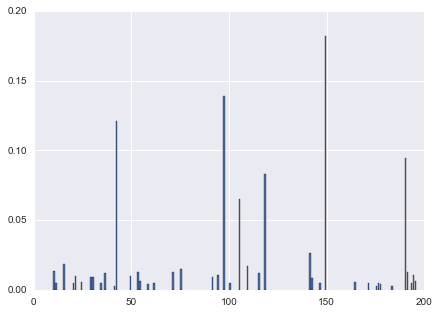

In [14]:
# 绘制特征重要性评分的条形图
ne0 = dt.feature_importances_ != 0

y_comp = dt.feature_importances_[ne0]
x_comp = np.arange(len(dt.feature_importances_))[ne0]

f, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_comp, y_comp);

# 决策树调参

In [15]:
# 创建分类数据集
from sklearn import datasets
X, y = datasets.make_classification(1000, 20, n_informative=3)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## 绘制决策树的树状图

In [17]:
from StringIO import StringIO
from sklearn import tree
import pydot
# 先安装graphviz-2.38.msi（http://www.graphviz.org/Download_windows.php），手动设置环境变量C:\Program Files (x86)\Graphviz2.38\bin
# 再pip install pydot

In [18]:
str_buffer = StringIO()
tree.export_graphviz(dt, out_file=str_buffer)
graph = pydot.graph_from_dot_data(str_buffer.getvalue())
graph[0].write_jpg("decision_tree.png") # graph是list，graph[0]是pydot.Dot，有write_jpg方法

True

In [19]:
# 编写绘制决策树树状图的函数
def plot_dt(model, filename):
    
    str_buffer = StringIO()
    tree.export_graphviz(model, out_file=str_buffer)
    
    graph = pydot.graph_from_dot_data(str_buffer.getvalue())
    graph[0].write_jpg(filename)

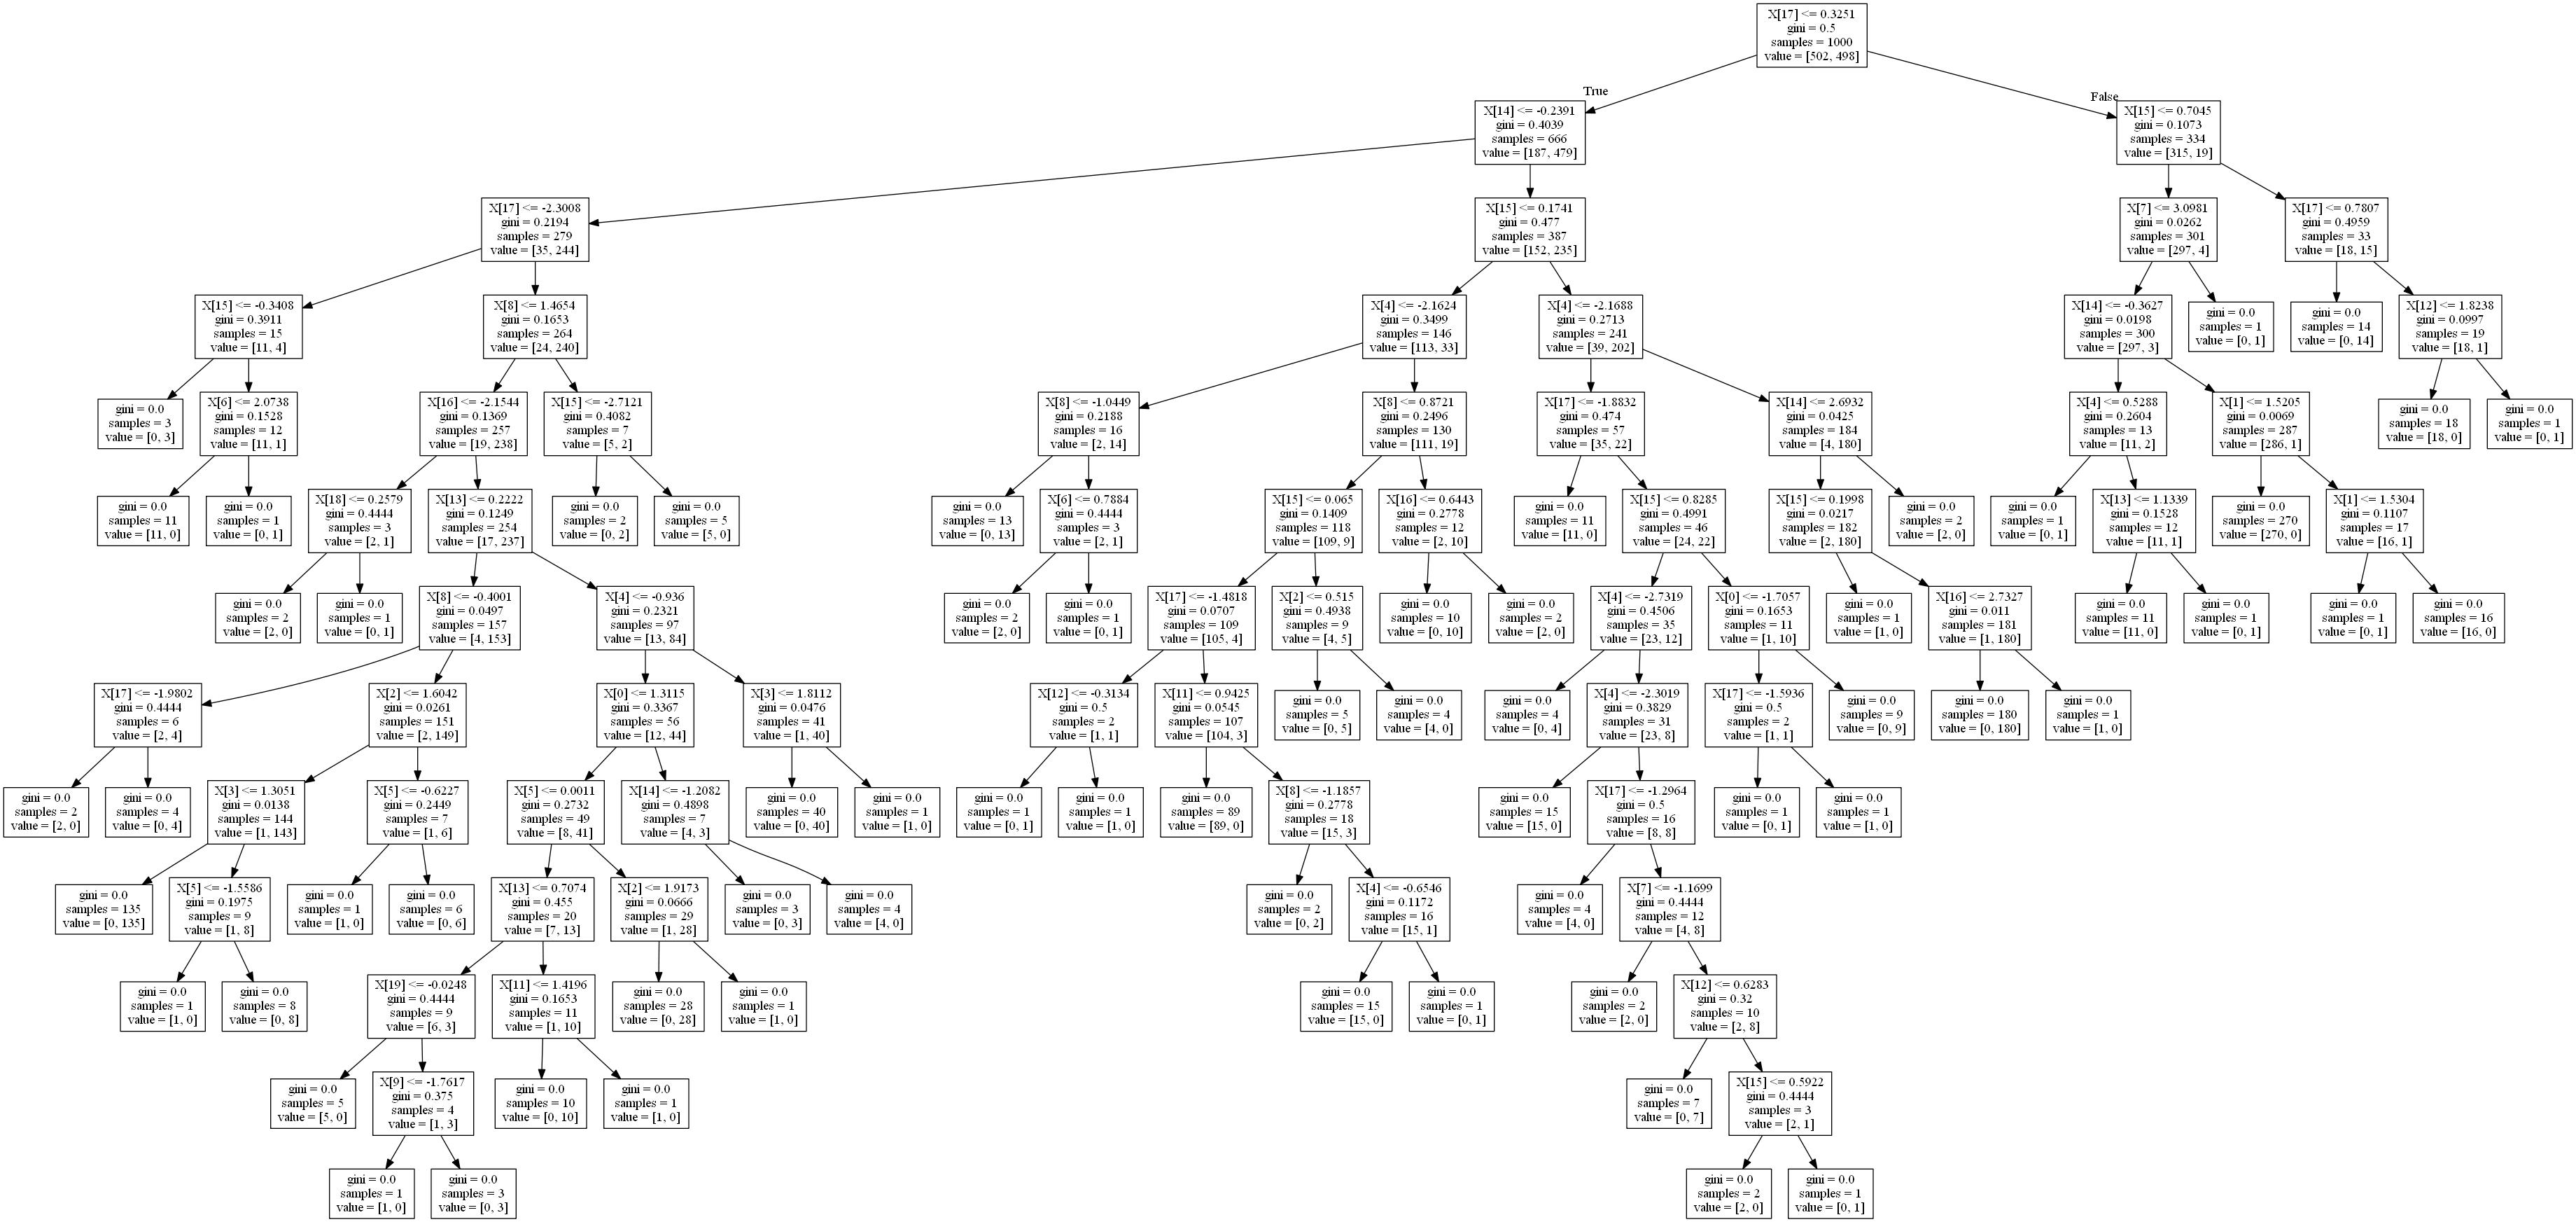

In [20]:
Image("decision_tree.png")

## max_depth参数

In [21]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

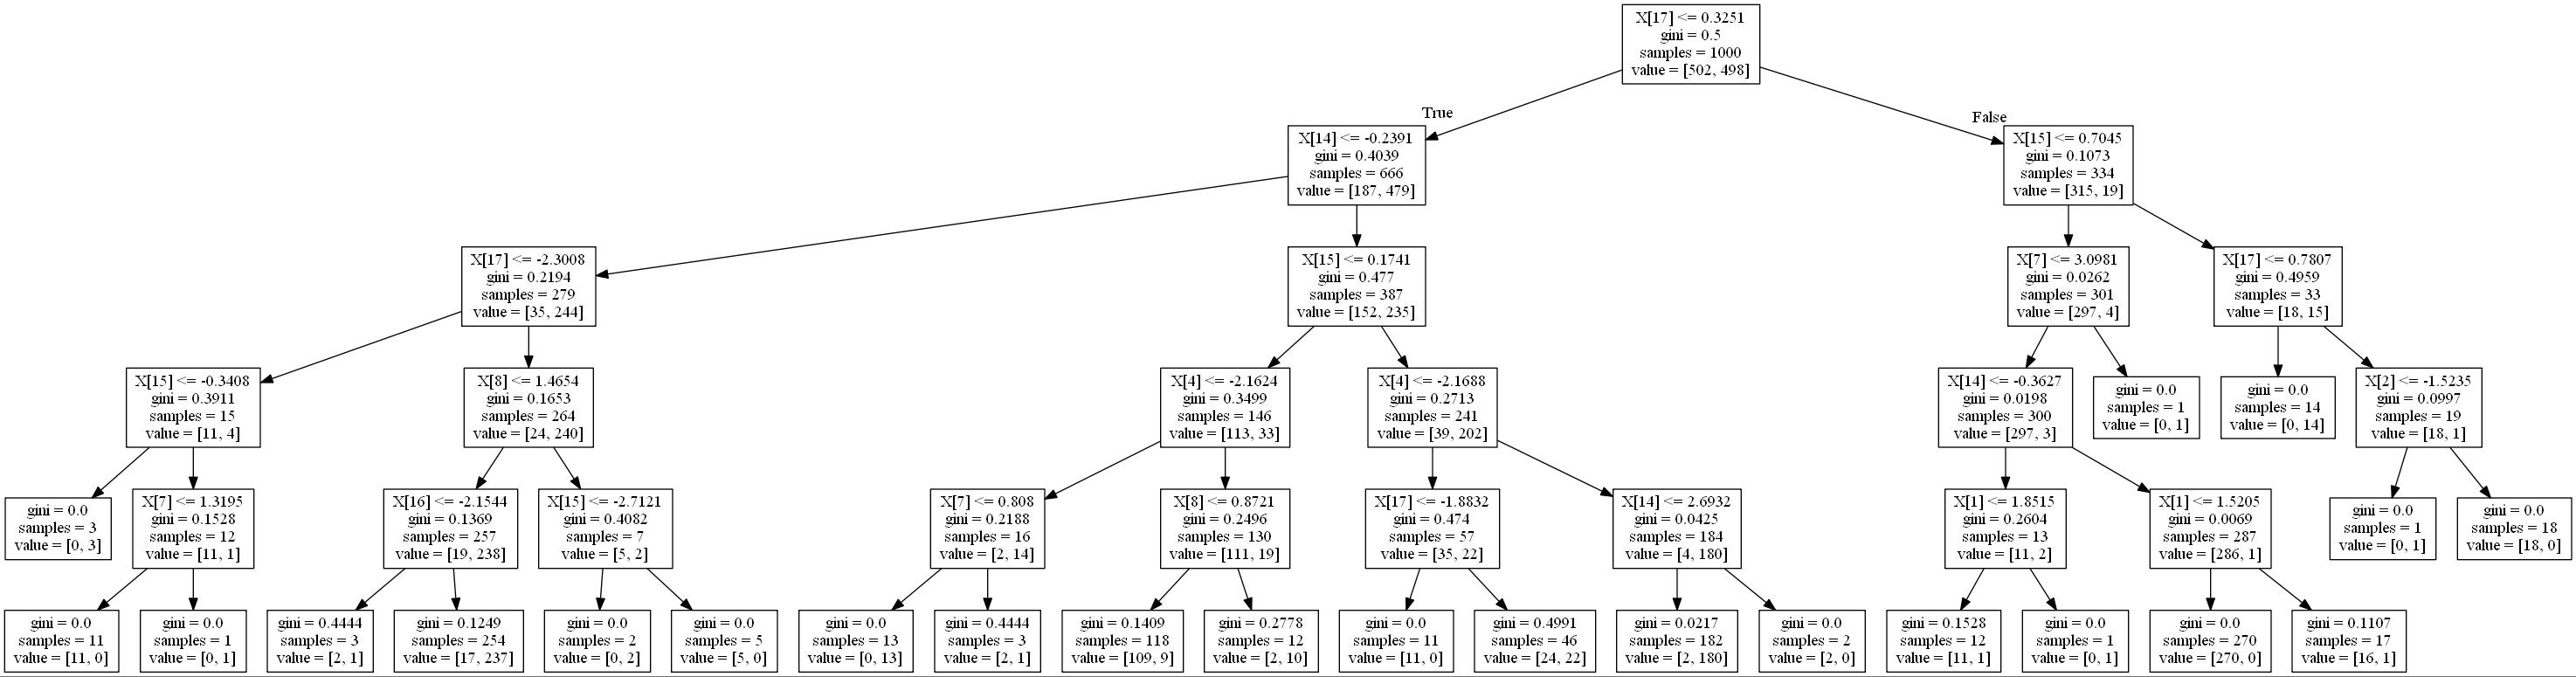

In [22]:
# 树的最大深度被限制为5，决策树的复杂程度显著降低
filename = "decision_tree_max_depth_5.png"
plot_dt(dt, filename)
Image(filename)

## criterion参数

In [23]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X, y)

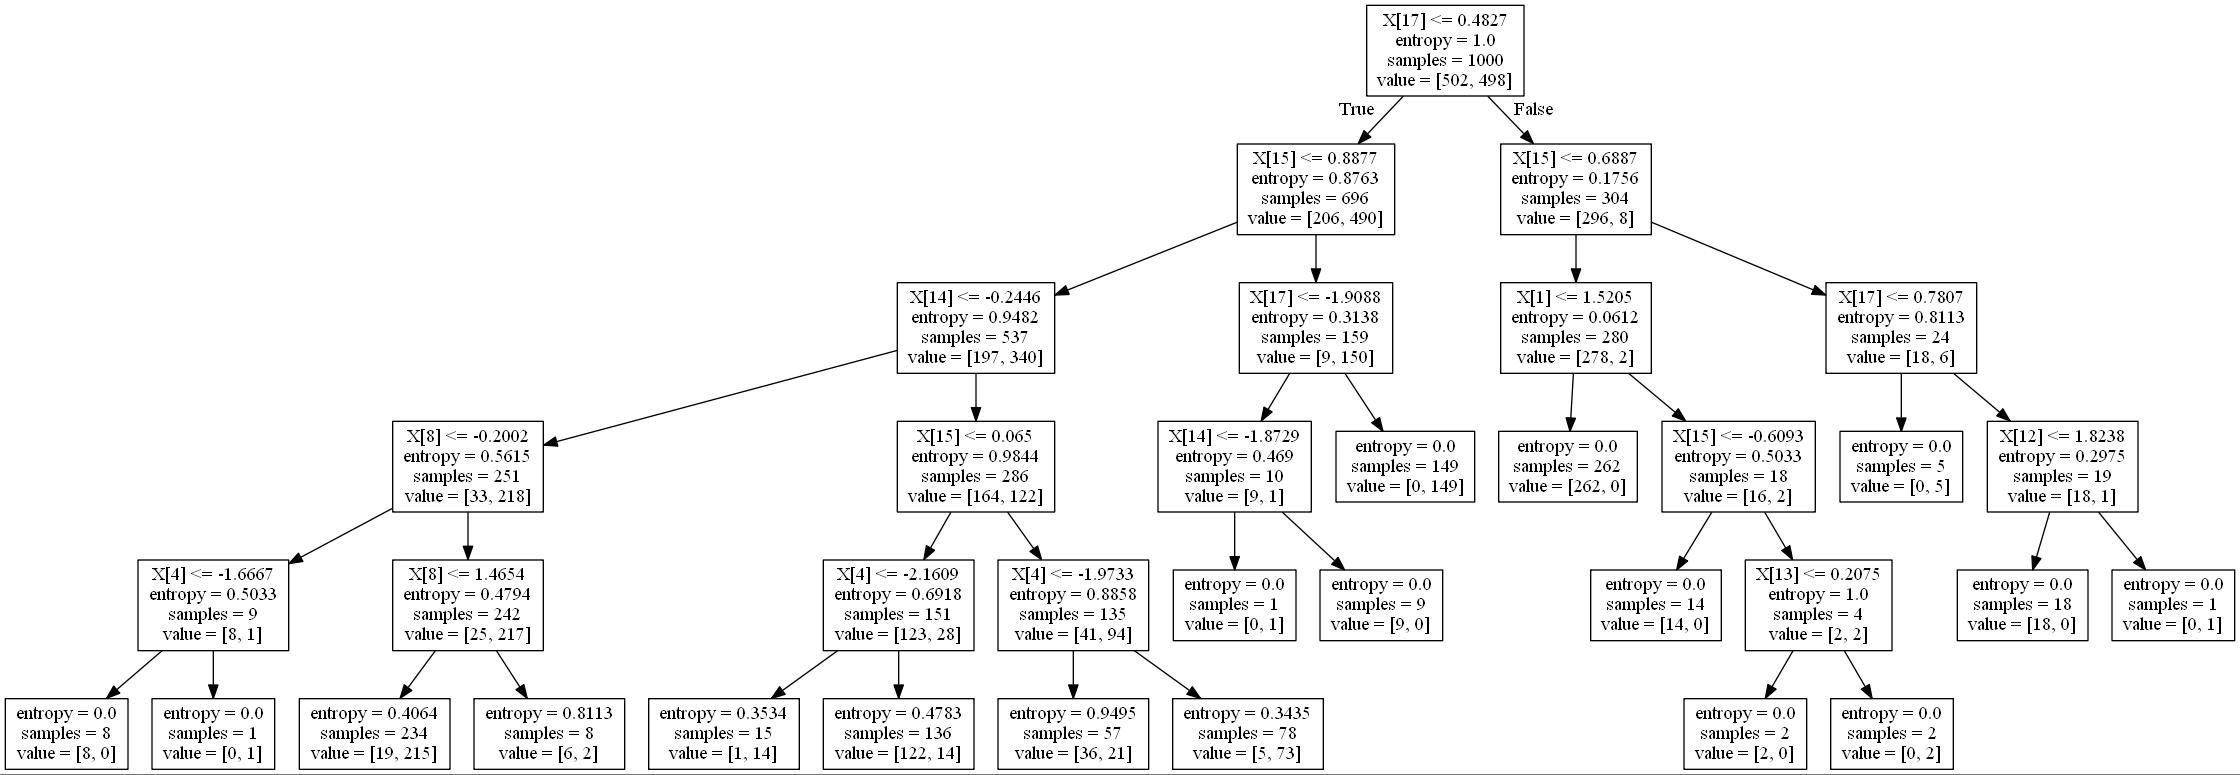

In [24]:

filename="decision_tree_criterion_entropy.png"
plot_dt(dt, filename)
Image(filename)

## min_samples_leaf参数

In [25]:
dt = DecisionTreeClassifier(min_samples_leaf=10, criterion='entropy', max_depth=5).fit(X, y)

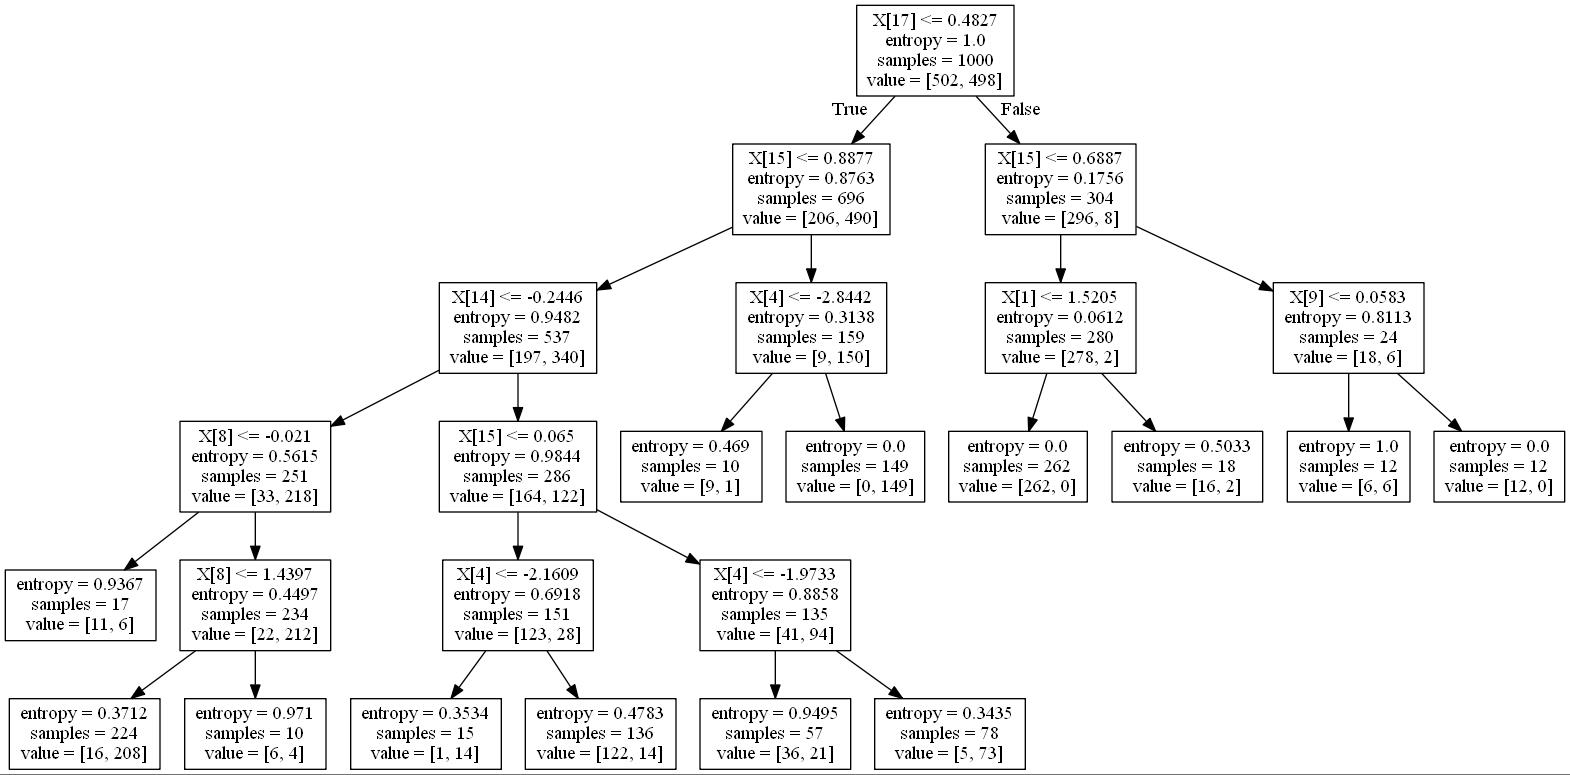

In [26]:
filename = "decision_tree_min_samples_leaf_10.png"
plot_dt(dt, filename)
Image(filename)

# 随机森林
RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn import datasets
X, y = datasets.make_classification(1000)

In [29]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
# 分类正确率
print "Accuracy:\t", (y == rf.predict(X)).mean()
print "Total Correct:\t", (y == rf.predict(X)).sum()

Accuracy:	0.993
Total Correct:	993


## 属性
* `rf.criterion` - the criterion for how the splits are determined.  The default is gini.
* `rf.bootstrap` - a boolean that indicates if we used bootstrap samples when training the Random forest
* `rf.n_jobs` - the number of jobs to train and predict with.  If you want to use all the processors, set this to -1.  Keep in mind that if you're dataset isn't very big, it's often more overhead to use multiple jobs due to the data having to be serialized and moved in between processes.
* `rf.max_features` - how many features to consider when making the best split.  This will come in handy during the turning processing.
* `rf.compute_importances` - whether to compute the importances of the features.  See the there's more section for how to use these.
* `rf.max_depth` - how deep each tree can go

## 预测
predict方法、predict_proba方法

In [31]:
# 计算分类的概率（涉及到predict方法、predict_proba方法）
probs = rf.predict_proba(X)

probs_df = pd.DataFrame(probs, columns=['0', '1'])
probs_df['was_correct'] = rf.predict(X) == y
probs_df.head()

,0,1,was_correct
0,0.8,0.2,True
1,0.0,1.0,True
2,0.8,0.2,True
3,0.9,0.1,True
4,0.0,1.0,True


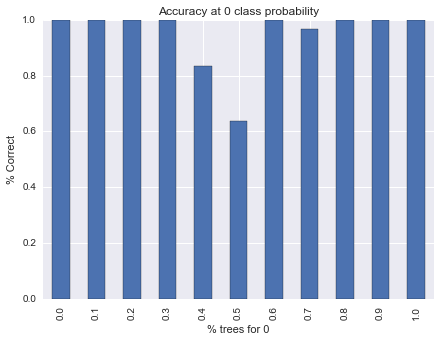

In [32]:
# 按照分为0类的概率分组计算正确率，可以看出，概率在0.5附件的样本比较容易被错分
f, ax = plt.subplots(figsize=(7, 5))

probs_df.groupby('0').was_correct.mean().plot(kind='bar', ax=ax)
ax.set_title("Accuracy at 0 class probability")
ax.set_ylabel("% Correct")
ax.set_xlabel("% trees for 0");

## 特征重要性评分
feature\_importances_属性

In [33]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

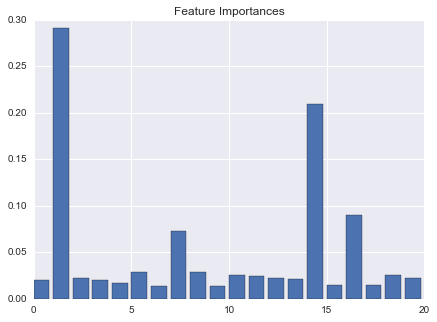

In [34]:
# 绘制特征重要性评分的条形图
f, ax = plt.subplots(figsize=(7, 5))

ax.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

ax.set_title("Feature Importances");

# 随机森林调参

In [35]:
# 创建更为复杂的分类数据集
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_features=20, n_informative=15, flip_y=.5, weights=[.2, .8])

In [36]:
# 80%训练集，20%测试集
training = np.random.choice([True, False], p=[.8, .2], size=y.shape)

In [37]:
# 未经调参的随机森林分类正确率
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X[training], y[training])

preds = rf.predict(X[~training])

print "Accuracy:\t", (preds == y[~training]).mean()

Accuracy:	0.652173913043


## max_features参数

In [38]:
from sklearn.metrics import confusion_matrix

max_feature_params = ['auto', 'sqrt', 'log2', .01, .5, .99]

confusion_matrixes = {}

for max_feature in max_feature_params:
    rf = RandomForestClassifier(max_features=max_feature)
    
    rf.fit(X[training], y[training])
    
    confusion_matrixes[max_feature] = confusion_matrix(y[~training], rf.predict(X[~training])).ravel() # ravel方法将2维混淆矩阵变为1维向量

In [39]:
confusion_df = pd.DataFrame(confusion_matrixes)
confusion_df

,0.01,0.5,0.99,auto,log2,sqrt
0,258,294,285,289,287,298
1,449,413,422,418,420,409
2,261,275,269,251,250,288
3,987,973,979,997,998,960


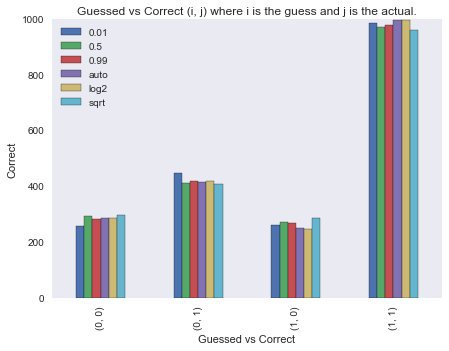

In [40]:
import itertools
f, ax = plt.subplots(figsize=(7, 5))

confusion_df.plot(kind='bar', ax=ax)

ax.legend(loc='best')

ax.set_title("Guessed vs Correct (i, j) where i is the guess and j is the actual.")

ax.grid()

ax.set_xticklabels([str((i, j)) for i, j in list(itertools.product(range(2), range(2)))])
ax.set_xlabel("Guessed vs Correct")
ax.set_ylabel("Correct");

## n_estimators参数

In [41]:
n_estimator_params = range(1, 20)

confusion_matrixes = {}

for n_estimator in n_estimator_params:
    rf = RandomForestClassifier(n_estimators=n_estimator)
    
    rf.fit(X[training], y[training])
    
    confusion_matrixes[n_estimator] = confusion_matrix(y[~training], rf.predict(X[~training]))
    
    # 正确率 = 混淆矩阵的迹 / 混淆矩阵各元素之和
    
    accuracy = lambda x: np.trace(x) / np.sum(x, dtype=float)
    confusion_matrixes[n_estimator] = accuracy(confusion_matrixes[n_estimator])

In [42]:
accuracy_series = pd.Series(confusion_matrixes)

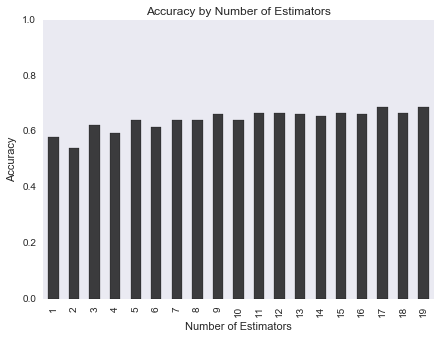

In [43]:
import itertools

f, ax = plt.subplots(figsize=(7, 5))

accuracy_series.plot(kind='bar', ax=ax, color='k', alpha=.75)
ax.grid()

ax.set_title("Accuracy by Number of Estimators")
ax.set_ylim(0, 1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Estimators");

## n_jobs参数

In [44]:
# n_jobs参数控制同时训练的树的个数，类似于让计算机多核同时工作
rf = RandomForestClassifier(n_jobs=4, verbose=True)
rf.fit(X, y)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [45]:
rf.predict(X)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([1, 1, 1, ..., 0, 1, 1])

# 支持向量机
SVC类

In [46]:
from sklearn.svm import SVC

In [47]:
# 创建分类数据集
from sklearn import datasets
X, y = datasets.make_classification()

In [48]:
base_svm = SVC()
base_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 属性
* C - in cases where we don't have a well seperated set, C will scale the error on the margin.  As C gets higher the penalization for the error becomes larger and the SVM will try to find a narrow margin even if it misclassifies more points
* class_weight - how much weight to give two each class in the problem.  This is given as a dictionary where classes are the keys and values are the weights associated with those classes.
* gamma - the gamma parameter for kernals.  This is suppored by 'rgb', 'sigmoid', and 'ploy'
* kernel - the kernel to use, rgb is the default and a popular choice.

## 线性支持向量机
LinearSVC类

In [49]:
X, y = datasets.make_blobs(n_features=2, centers=2)

In [50]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [51]:
from itertools import product
from collections import namedtuple

In [52]:
Point = namedtuple('Point', ['x', 'y', 'outcome'])

In [53]:
import numpy as np

decision_boundery = []

# 找出X数据集两个特征的最大值、最小值
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

# 为下面绘制决策边界生成样本点
for xpt, ypt in product(np.linspace(xmin-2.5, xmax+2.5, 20), np.linspace(ymin-2.5, ymax+2.5, 20)):
    
    p = Point(xpt, ypt, svm.predict([[xpt, ypt]])) # 生成3元素的元组，3个元素分别为样本点的x坐标、y坐标、预测分类
    
    decision_boundery.append(p)

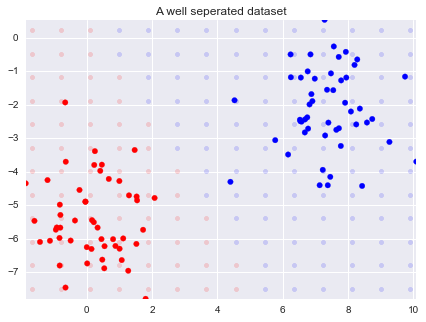

In [54]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

# 绘制决策边界（半透明点）
for xpt, ypt, pt in decision_boundery:
    ax.scatter(xpt, ypt, color=colors[pt[0]], alpha=.15)

# 绘制样本点，并以颜色表示预测分类
ax.scatter(X[:, 0], X[:, 1], color=colors[y], s=30)
    
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

ax.set_title("A well seperated dataset");

## 非线性支持向量机

### LinearSVC

In [55]:
X, y = datasets.make_classification(n_features=2, n_classes=2, n_informative=2, n_redundant=0)

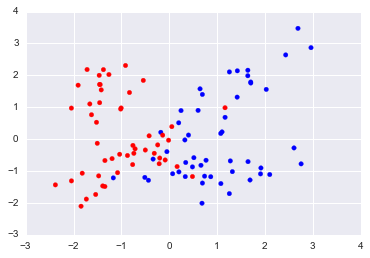

In [56]:
plt.scatter(X[:, 0], X[:, 1], color=colors[y]);

In [57]:
svm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [58]:
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
test_preds = svm.predict(test_points)

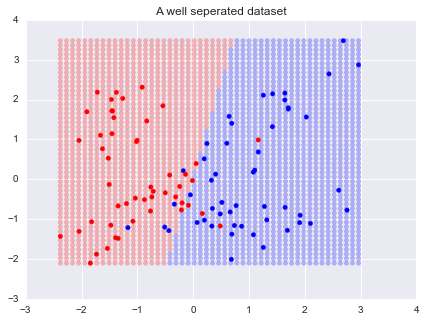

In [59]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

# 绘制决策边界（半透明点）
ax.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=.25)

# 绘制样本点，并以颜色表示预测分类
ax.scatter(X[:, 0], X[:, 1], color=colors[y])


ax.set_title("A well seperated dataset");

### kernel='rbf'

In [60]:
radial_svm = SVC(kernel='rbf')
radial_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
np.percentile(X[:, 0], [0, 100])
np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
test_preds = radial_svm.predict(test_points)

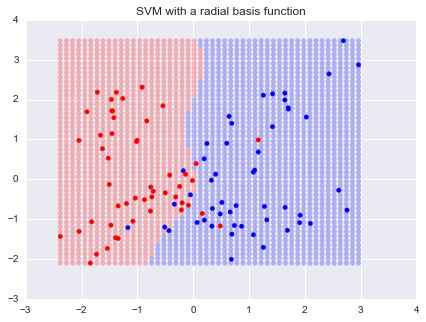

In [62]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

ax.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=.25)

ax.scatter(X[:, 0], X[:, 1], color=colors[y])

ax.set_title("SVM with a radial basis function");

### 自定义核

In [63]:
def test_kernel(X, y):
    """ Test kernel that returns the exponentiation of the dot of the X and y matrices.
    
    This looks an awful lot like the log hazards if you're familiar with survival analysis.
    """
    return np.exp(np.dot(X, y.T))

In [64]:
test_svc = SVC(kernel=test_kernel)
test_svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function test_kernel at 0x000000000AAA9AC8>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [65]:
np.percentile(X[:, 0], [0, 100])
np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
test_preds = test_svc.predict(test_points)

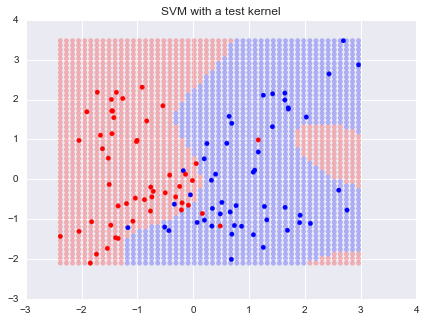

In [66]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

ax.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=.25)

ax.scatter(X[:, 0], X[:, 1], color=colors[y])

ax.set_title("SVM with a test kernel");

# 多类别分类问题
OneVsRestClassifier类

In [67]:
from sklearn.multiclass import OneVsRestClassifier

In [68]:
# 创建3类分类数据集
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_classes=3, n_informative=3)

In [69]:
# 部分非线性分类器可以自动完成多类别分类工作
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.predict(X)

array([0, 1, 0, ..., 1, 0, 2])

In [70]:
# 线性分类器无法自动完成多类别分类工作，需要引入OneVsRestClassifier类
from sklearn.linear_model import LogisticRegression

In [71]:
mlr = OneVsRestClassifier(LogisticRegression(), n_jobs=2) # one-vs-rest（one-vs-all）方法对每个类别都会建立一个分类器，因此可以多线程建模，设置n_jobs参数
mlr.fit(X, y)
mlr.predict(X)

array([0, 1, 0, ..., 1, 0, 2])

## 自定义函数模拟OneVsRestClassifier工作方式

In [72]:
# 用one-vs-rest方式重新编码标签
def train_one_vs_rest(y, class_label):
    y_train = (y == class_label).astype(int)
    
    return y_train

In [73]:
# 用one-vs-rest方式训练k个分类器，k为类别数
classifiers = []
for class_i in sorted(np.unique(y)):
    
    l = LogisticRegression()
    y_train = train_one_vs_rest(y, class_i)

    l.fit(X, y_train)
    
    classifiers.append(l)

In [74]:
# 分别计算样本点分到k类的概率，取概率最大的类
for classifier in classifiers:
    
    print classifier.predict_proba([X[0]])

[[ 0.23684963  0.76315037]]
[[ 0.87032371  0.12967629]]
[[ 0.92312203  0.07687797]]


# Linear Discriminant Analysis (LDA)
LinearDiscriminantAnalysis类

## 获取数据集

In [75]:
# 从yahoo获得股票价格数据
tickers = ["F", "TM", "GM", "TSLA"]
from pandas_datareader import data as external_data
stock_panel = external_data.DataReader(tickers, "yahoo")

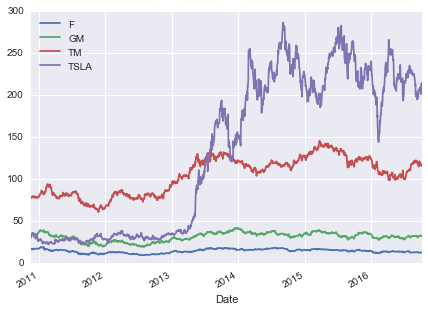

In [76]:
# 绘制股票收盘价走势图
stock_df = stock_panel.Close.dropna()
stock_df.plot(figsize=(7, 5));

In [77]:
# 如果股价在未来6个月上涨，则标签为1，否则标签为1
# this dataframe indicates if the stock was higher in 180 days
classes = (stock_df.shift(-180) > stock_df).astype(int)
classes.head()

,F,GM,TM,TSLA
Date,,,,
2010-11-18,0,0,0,0
2010-11-19,0,0,0,0
2010-11-22,0,0,0,0
2010-11-23,0,0,0,0
2010-11-24,0,0,0,0


In [78]:
# 对数据进行一系列变换
X = stock_panel.to_frame()
classes = classes.unstack()
classes = classes.swaplevel(0, 1).sort_index()

classes = classes.to_frame()

classes.index.names = ['Date', 'minor']

data = X.join(classes).dropna()
data.rename(columns={0: 'is_higher'}, inplace=True)

data.head()

Open       High        Low      Close       Volume  \
Date       minor                                                            
2010-11-18 F      16.770000  16.870001  16.049999  16.120001  256937900.0   
           GM     35.000000  35.990002  33.889999  34.189999  457044300.0   
           TM     77.360001  77.510002  76.830002  77.290001     989100.0   
           TSLA   30.670000  30.740000  28.920000  29.889999     956100.0   
2010-11-19 F      16.020000  16.379999  15.830000  16.280001  130323600.0   

                  Adj Close  is_higher  
Date       minor                        
2010-11-18 F      13.581237        0.0  
           GM     30.538663        0.0  
           TM     77.290001        0.0  
           TSLA   29.889999        0.0  
2010-11-19 F      13.716038        0.0

In [79]:
import patsy # This is a great library that can be used to create a design matrix in a similar fashion as R.

In [80]:
# 在patsy 0.4.1下不会报错
X = patsy.dmatrix("Open + High + Low + Close + Volume + is_higher - 1", data.reset_index(), return_type='dataframe')

In [81]:
X.head()

,Open,High,Low,Close,Volume,is_higher
0,16.770000,16.870001,16.049999,16.120001,256937900.0,0.0
1,35.000000,35.990002,33.889999,34.189999,457044300.0,0.0
2,77.360001,77.510002,76.830002,77.290001,989100.0,0.0
3,30.670000,30.740000,28.920000,29.889999,956100.0,0.0
4,16.020000,16.379999,15.830000,16.280001,130323600.0,0.0


## LDA模型
LinearDiscriminantAnalysis类

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X.ix[:, :-1], X.ix[:, -1]);

In [83]:
# 返回模型的预测效果
from sklearn.metrics import classification_report
print classification_report(X.ix[:, -1].values, lda.predict(X.ix[:, :-1]))

             precision    recall  f1-score   support

        0.0       0.64      0.86      0.73      3344
        1.0       0.67      0.37      0.47      2572

avg / total       0.65      0.65      0.62      5916



# Quadratic Discernment Analysis (QDA)
QuadraticDiscriminantAnalysis类

In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X.ix[:, :-1], X.ix[:, -1])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [85]:
predictions = qda.predict(X.ix[:, :-1])
predictions.sum()

3101.0

In [86]:
from sklearn.metrics import classification_report
print classification_report(X.ix[:, -1].values, predictions)

             precision    recall  f1-score   support

        0.0       0.66      0.56      0.60      3344
        1.0       0.52      0.63      0.57      2572

avg / total       0.60      0.59      0.59      5916



## 算法原理

In [87]:
from sklearn import cross_validation as cv
import scipy.stats as sp
for test, train in cv.ShuffleSplit(len(X.Close), n_iter=1):
    
    # 划分训练集、测试集
    train_set = X.iloc[train]
    
    # 取出训练集的收盘价数据
    train_close = train_set.Close
    
    # 分别取出训练集中的0类、1类
    train_0 = train_close[~train_set.is_higher.astype(bool)]
    train_1 = train_close[train_set.is_higher.astype(bool)]
    
    # 取出测试集的收盘价数据
    test_set = X.iloc[test]
    test_close = test_set.Close.values
    
    # 分别计算样本点属于0类、1类的概率
    ll_0 = sp.norm.pdf(test_close, train_0.mean())
    ll_1 = sp.norm.pdf(test_close, train_1.mean())

In [88]:
# 根据样本点属于0类、1类的概率大小来决定分类
(ll_0 > ll_1).mean()

0.11607813673929376

# 分类问题中的随机梯度下降
SGDClassifier类

In [89]:
# 创建分类数据集
from sklearn import datasets
X, y = datasets.make_classification()

In [90]:
from sklearn import linear_model
sgd_clf = linear_model.SGDClassifier()
sgd_clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

# 朴素贝叶斯


## 获取数据集

In [91]:
# 朴素贝叶斯多用于根据词频进行文档分类（例如垃圾邮件检测），这里下载新闻文档数据集
from sklearn.datasets import fetch_20newsgroups
categories = ["rec.autos", "rec.motorcycles"]
newgroups = fetch_20newsgroups(categories=categories) # 只取'autos'和'motorcycles'两类新闻

# 看一下数据的结构
print "\n".join(newgroups.data[:1])

From: gregl@zimmer.CSUFresno.EDU (Greg Lewis)
Subject: Re: WARNING.....(please read)...
Keywords: BRICK, TRUCK, DANGER
Nntp-Posting-Host: zimmer.csufresno.edu
Organization: CSU Fresno
Lines: 33

In article <1qh336INNfl5@CS.UTK.EDU> larose@austin.cs.utk.edu (Brian LaRose) writes:
>This just a warning to EVERYBODY on the net.  Watch out for
>folks standing NEXT to the road or on overpasses.   They can
>cause SERIOUS HARM to you and your car.  
>
>(just a cliff-notes version of my story follows)
>
>10pm last night, I was travelling on the interstate here in
>knoxville,  I was taking an offramp exit to another interstate
>and my wife suddenly screamed and something LARGE hit the side
>of my truck.  We slowed down, but after looking back to see the
>vandals standing there, we drove on to the police station.
>
>She did get a good look at the guy and saw him "cock his arm" with
>something the size of a cinderblock, BUT I never saw him. We are 
>VERY lucky the truck sits up high on the road; i

In [92]:
newgroups.target_names # 两类新闻

['rec.autos', 'rec.motorcycles']

In [93]:
# 朴素贝叶斯模型将文档视为一堆词汇的组合，且将每个词的出现都视为独立事件
# 进行特征提取，将文档转化为一个稀疏矩阵，行为样本，列为词，每个出现的词都有自己的列，值为词出现的频率
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(newgroups.data)

In [94]:
# 转化为矩阵
bow = np.array(bow.todense())

In [95]:
# 返回第一篇新闻中，出现频率不为0的前5个词
words = np.array(count_vec.get_feature_names())
words[bow[0] > 0][:5]

array([u'10pm', u'1qh336innfl5', u'33', u'93740',
       u'___________________________________________________________________'], 
      dtype='<U79')

In [96]:
'10pm' in newgroups.data[0].lower(), '1qh336innfl5' in newgroups.data[0].lower() # 检查这几个词是否在第一篇新闻中出现

(True, True)

## 朴素贝叶斯模型
naive_bayes.GaussianNB类（多元正态分布假设）

In [97]:
from sklearn import naive_bayes

In [98]:
# 将数据集分为训练集、测试集
mask = np.random.choice([True, False], len(bow))

In [99]:
# 在训练集上训练模型
clf = naive_bayes.GaussianNB()
clf.fit(bow[mask], newgroups.target[mask])

GaussianNB()

In [100]:
predictions = clf.predict(bow[~mask])

In [101]:
np.mean(predictions == newgroups.target[~mask]) # 返回分类正确率

0.93344155844155841

## 多类别的朴素贝叶斯模型
naive_bayes.MultinomialNB类（多项分布假设）

In [102]:
# 获取数据集
from sklearn.datasets import fetch_20newsgroups
mn_categories = ["rec.autos", "rec.motorcycles", "talk.politics.guns"]
mn_newgroups = fetch_20newsgroups(categories=mn_categories)

In [103]:
# 特征提取
mn_bow = count_vec.fit_transform(mn_newgroups.data)
mn_bow = np.array(mn_bow.todense())

In [104]:
# 将数据集分为训练集、测试集
mn_mask = np.random.choice([True, False], len(mn_newgroups.data))

In [105]:
# 在训练集上训练模型
multinom = naive_bayes.MultinomialNB()
multinom.fit(mn_bow[mn_mask], mn_newgroups.target[mn_mask])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
mn_predict = multinom.predict(mn_bow[~mn_mask])

In [107]:
np.mean(mn_predict == mn_newgroups.target[~mn_mask])

0.95739644970414206

# 半监督学习
semi_supervised.LabelPropagation类、semi_supervised.LabelSpreading类

## 获取数据集

In [108]:
# 获取分类数据集
from sklearn import datasets
d = datasets.load_iris()

In [109]:
X = d.data.copy()
y = d.target.copy()
names = d.target_names.copy()

In [110]:
# 增加没有标签的类别
names = np.append(names, ['unlabeled'])
names

array(['setosa', 'versicolor', 'virginica', 'unlabeled'], 
      dtype='|S10')

In [111]:
# 一部分样本的标签改为-1，表示没有标签
y[np.random.choice([True, False], len(y))] = -1
y[:10]

array([-1, -1,  0,  0,  0, -1,  0, -1,  0, -1])

In [112]:
names[y[:10]] # -1代表没有标签

array(['unlabeled', 'unlabeled', 'setosa', 'setosa', 'setosa', 'unlabeled',
       'setosa', 'unlabeled', 'setosa', 'unlabeled'], 
      dtype='|S10')

## 半监督模型

### semi_supervised.LabelPropagation类

In [113]:
from sklearn import semi_supervised
lp = semi_supervised.LabelPropagation()
lp.fit(X, y)

LabelPropagation(alpha=1, gamma=20, kernel='rbf', max_iter=30, n_neighbors=7,
         tol=0.001)

In [114]:
preds = lp.predict(X)

In [115]:
(preds == d.target).mean() # 分类正确率

0.96666666666666667

### semi_supervised.LabelSpreading类

In [116]:
ls = semi_supervised.LabelSpreading()
ls.fit(X, y)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_neighbors=7,
        tol=0.001)

In [117]:
(ls.predict(X) == d.target).mean() # 分类正确率

0.96666666666666667